In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('./kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [86]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [118]:
data = pd.read_csv("real5foldercsv.csv").head(10000)


In [119]:
x_data = data['pixels']
y_data = data['emotion']

In [120]:
x_train_1 = x_data[0:8000]
x_val_1 = x_data[8001:9000]

In [121]:
y_train_1 = y_data[0:8000]
y_val_1 = y_data[8001:9000]

In [104]:
x_train_1.shape

(8000,)

In [142]:

x_train_2 = np.array(list(map(str.split,x_train_1)), np.float32).reshape(48,48)
x_val_2= np.array(list(map(str.split,x_val_1)), np.float32)

In [132]:
x_train_3 = x_train_2.reshape(-1,1)
x_val_3 = x_val_2.reshape(-1,1)

In [134]:
x_train_2.shape

(8000, 2304)

In [133]:
x_train_3.shape

(18432000, 1)

In [123]:
y_train_2 = np.array(y_train_1, dtype = 'uint8')
y_val_2 = np.array(y_val_1, dtype = 'uint8')

In [139]:
x_train_1.shape

(8000,)

In [161]:
for i in x_train_2:
    print(type(i))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

ValueError: cannot reshape array of size 18432000 into shape (48,48)

In [ ]:
np.array(list(map(str.split,x_train_1)), np.float32)

In [158]:
x_train_1

0       34 18 20 9 9 15 19 10 15 9 12 6 13 15 12 11 11...
1       33 31 40 79 78 73 67 78 87 83 79 89 98 113 106...
2       176 180 170 129 101 106 108 120 129 126 130 13...
3       34 37 38 36 48 53 51 54 61 56 55 54 43 43 48 4...
4       116 117 118 117 120 120 119 121 124 121 119 12...
                              ...                        
7995    174 166 94 47 37 31 29 45 70 63 67 37 18 19 51...
7996    29 40 61 88 96 104 116 125 124 125 121 121 128...
7997    123 125 124 125 124 122 121 131 144 141 131 13...
7998    29 48 50 85 76 79 67 63 57 35 26 23 15 12 8 6 ...
7999    69 68 73 70 68 71 78 70 72 72 72 72 72 72 70 7...
Name: pixels, Length: 8000, dtype: object

['0',
 '',
 '',
 '',
 '',
 '',
 '',
 '34',
 '18',
 '20',
 '9',
 '9',
 '15',
 '19',
 '10',
 '15',
 '9',
 '12',
 '6',
 '13',
 '15',
 '12',
 '11',
 '11...\n1',
 '',
 '',
 '',
 '',
 '',
 '',
 '33',
 '31',
 '40',
 '79',
 '78',
 '73',
 '67',
 '78',
 '87',
 '83',
 '79',
 '89',
 '98',
 '113',
 '106...\n2',
 '',
 '',
 '',
 '',
 '',
 '',
 '176',
 '180',
 '170',
 '129',
 '101',
 '106',
 '108',
 '120',
 '129',
 '126',
 '130',
 '13...\n3',
 '',
 '',
 '',
 '',
 '',
 '',
 '34',
 '37',
 '38',
 '36',
 '48',
 '53',
 '51',
 '54',
 '61',
 '56',
 '55',
 '54',
 '43',
 '43',
 '48',
 '4...\n4',
 '',
 '',
 '',
 '',
 '',
 '',
 '116',
 '117',
 '118',
 '117',
 '120',
 '120',
 '119',
 '121',
 '124',
 '121',
 '119',
 '12...\n5',
 '',
 '',
 '',
 '',
 '',
 '',
 '8',
 '14',
 '12',
 '11',
 '7',
 '11',
 '8',
 '12',
 '11',
 '15',
 '13',
 '15',
 '11',
 '12',
 '11',
 '13',
 '1...\n6',
 '',
 '',
 '',
 '',
 '',
 '',
 '10',
 '3',
 '4',
 '5',
 '6',
 '7',
 '7',
 '10',
 '12',
 '13',
 '13',
 '17',
 '41',
 '79',
 '74',
 '75',
 '82

In [152]:
k = np.array(list(map(str,(x_train_1.to_string()).split(" "))),).reshape((48,48))


ValueError: cannot reshape array of size 141666 into shape (48,48)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (8000, 2304)

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto')

x_train_over, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

In [116]:
x_train_2.shape

(8000, 2304)

In [115]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(x_train_2.reshape(10000, 48, 48, 1))

testgen = ImageDataGenerator( 
    rescale=1./255
    )

batch_size = 64

ValueError: cannot reshape array of size 18432000 into shape (10000,48,48,1)

In [83]:
batch_size = 64

In [84]:
train_flow = Im.flow(x_train_2, y_train_1, batch_size=batch_size) 
test_flow = Im.flow(x_val_2, y_val_1, batch_size=batch_size)

AttributeError: 'list' object has no attribute 'data_format'

In [124]:
from keras.callbacks import ModelCheckpoint
filepath="weights_min_loss.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

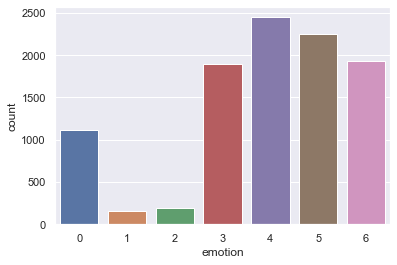

In [125]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [126]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from tensorflow.keras.optimizers import Adam,SGD

from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [130]:
def FER_Model(input_shape=(32, 2304)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 7
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)#the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
    conv2_2 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)#the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    conv3_2 = BatchNormalization()(conv3_2)
    conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
    conv3_3 = BatchNormalization()(conv3_3)
    conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
    conv3_4 = BatchNormalization()(conv3_4)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)#the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)
    
    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
    conv5_3 = BatchNormalization()(conv5_3)
    conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
    conv5_3 = BatchNormalization()(conv5_3)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)# create model 
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())
    
    return model

In [162]:
model = FER_Model()
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

ValueError: Input 0 of layer "conv1_1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 2304)

(10000, 2304)

ValueError: Input 0 of layer "conv1_1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 2304)

In [129]:

history = model.fit(x_train_2, y_train_2, validation_data = (x_val_2, y_val_2), epochs = 200)

Epoch 1/200


ValueError: in user code:

    File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 48, 48, 1), found shape=(32, 2304)


In [6]:
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(97960, 1)   (97960,)


In [7]:
y_data.value_counts()

0    12245
1    12245
2    12245
3    12245
4    12245
5    12245
6    12245
7    12245
Name: emotion, dtype: int64

In [8]:
x_data = pd.Series(x_data.flatten())
x_data

0        34 18 20 9 9 15 19 10 15 9 12 6 13 15 12 11 11...
1        33 31 40 79 78 73 67 78 87 83 79 89 98 113 106...
2        176 180 170 129 101 106 108 120 129 126 130 13...
3        34 37 38 36 48 53 51 54 61 56 55 54 43 43 48 4...
4        116 117 118 117 120 120 119 121 124 121 119 12...
                               ...                        
97955    38 35 36 35 200 237 242 244 234 244 241 239 17...
97956    187 178 184 173 172 167 162 155 151 143 134 12...
97957    26 28 31 34 30 31 28 25 25 23 22 20 21 24 24 2...
97958    65 65 64 57 56 52 49 48 51 55 57 56 63 63 65 6...
97959    5 6 7 8 9 26 27 19 24 37 63 77 66 74 80 72 68 ...
Length: 97960, dtype: object

In [9]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255

In [10]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(97960, 1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)
print(x_train.shape," ",y_train.shape)

(88164, 2304)   (88164, 1)


In [12]:
y_train = np_utils.to_categorical(y_train, 8)
y_test = np_utils.to_categorical(y_test, 8)

In [13]:
model = keras.Sequential([
    Input(x_train.shape[1]),
    Dense(256, activation = 'leaky_relu'),
    BatchNormalization(axis = 1),
    Dense(128, activation = 'relu'),
    BatchNormalization(axis = 1),
    Dense(8, activation = 'softmax')
])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               590080    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 625,544
Trainable params: 624,776
Non-trai

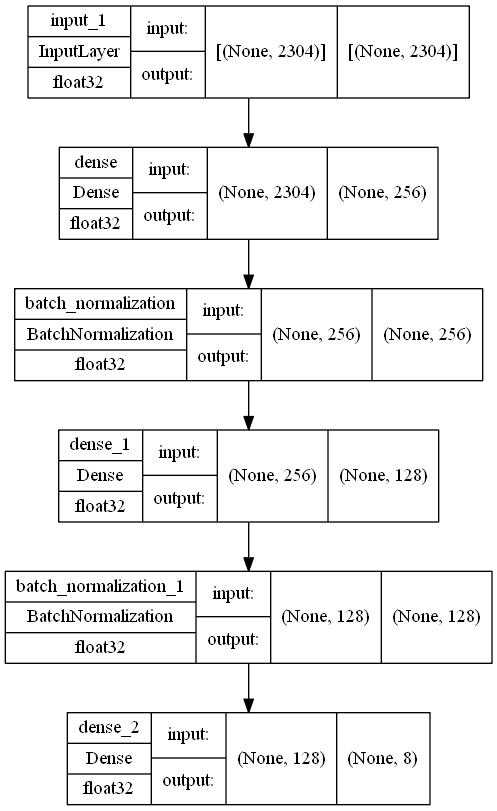

In [14]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [15]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
adel = keras.optimizers.Adadelta()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200)

Epoch 1/200


In [ ]:
print("Accuracy of our model on validation data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

307/307 [==============================] - 1s 2ms/step - loss: 1.2612 - accuracy: 0.6444
Accuracy of our model on validation data :  64.44467306137085 %


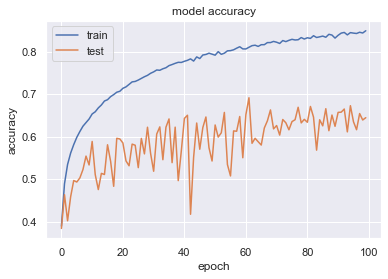

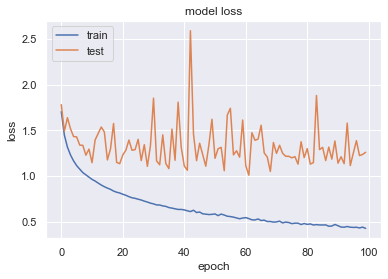

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x_test)
y_pred = []

for p in predictions:
    y_pred.append(np.argmax(p))
y_pred[:10]

[0, 0, 4, 2, 0, 7, 5, 2, 5, 0]

In [ ]:
y_actual = []

for a in y_test:
    y_actual.append(np.argmax(a))
y_actual[:10]

[0, 3, 4, 2, 0, 7, 7, 2, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      1214
           1       0.90      0.99      0.94      1208
           2       0.98      0.52      0.68      1196
           3       0.60      0.63      0.61      1231
           4       0.67      0.43      0.52      1267
           5       0.40      0.58      0.47      1193
           6       0.48      0.60      0.53      1236
           7       0.73      0.82      0.77      1251

    accuracy                           0.64      9796
   macro avg       0.68      0.64      0.65      9796
weighted avg       0.68      0.64      0.65      9796



Text(66.5, 0.5, 'Truth')

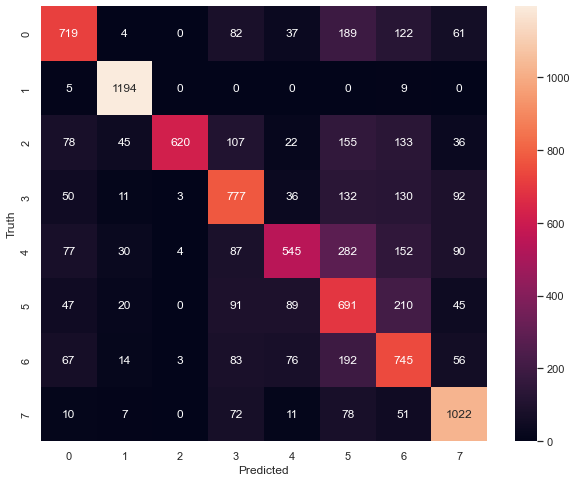

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_pred)

plt.figure(figsize = (10, 8))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# THIS ONE IS SOFTMAX

In [2]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

In [ ]:
#serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [1]:
test_pure_input = r'C:\Users\ANFIELD\Desktop\tu\cn240\ml\CN240\CN240\Ann'

In [ ]:
def test_real(input):
    list_pixel = []
    image = cv2.imread(input)

    image = cv2.resize(image,(48,48))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    for y in range(48):
        for x in range(48):
            list_pixel.append(gray[x][y])
    test_data =[]
    test_data.append(list_pixel)
    plt.imshow(test_data.reshape(48, 48),cmap='Greys')
    pred = loaded_model.predict(test_data.reshape(1, 48, 48, 1))
    print("Prediction probability array is:")

    count = 0

    for i in pred.squeeze():
        print(count, ":", i)
        count += 1

    print("From which the max choice is:", pred.argmax())
    return pred.argmax()
    

In [ ]:
for i in test_pure_input:
    predis  = test_real(test_pure_input+"/"+i)
    print(predis)
    